# Plot bivariate KDEs for GMM

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

In [5]:
par_nuts = pd.read_pickle('./parameters/par_nuts_sep_plot')
par_advi = pd.read_pickle('./parameters/par_advi_sep_plot')


rep = 10
par_bb_rr = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))

par_bb_mle = pd.read_pickle('./parameters/par_bb_sep_fi_B2000_plot')

#concatenate samples
pi_nuts = par_nuts[['pi[1]','pi[2]','pi[3]']]
mu_nuts = par_nuts[['mu[1,1]','mu[2,1]','mu[3,1]']]
sigma_nuts = par_nuts[['sigma[1,1]','sigma[2,1]','sigma[3,1]']]

pi_advi =par_advi[['pi[1]','pi[2]','pi[3]']]
mu_advi =par_advi[['mu[1,1]','mu[2,1]','mu[3,1]']]
sigma_advi = par_advi[['sigma[1,1]','sigma[2,1]','sigma[3,1]']]

pi_bb_rr =np.array(par_bb_rr['pi'])
mu_bb_rr =np.array(par_bb_rr['mu'])[:,:,0]
sigma_bb_rr = np.array(par_bb_rr[['sigma']][0])[:,:,0]

pi_bb_mle =np.array(par_bb_mle['pi'])
mu_bb_mle =np.array(par_bb_mle['mu'])[:,:,0]
sigma_bb_mle = np.array(par_bb_mle[['sigma']][0])[:,:,0]


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

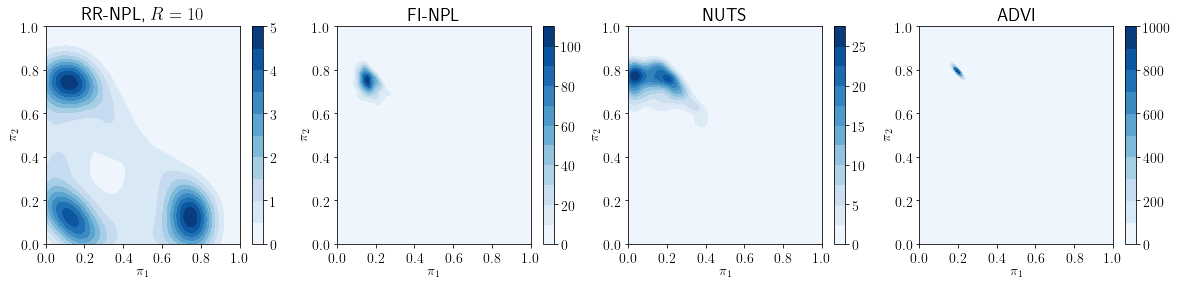

In [112]:
f = plt.figure(figsize = (20,4))
plt.subplot(1,4,1)
ax = sns.kdeplot(np.concatenate((pi_bb_rr[:,1],[0,0,1,1])),np.concatenate((pi_bb_rr[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14,labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel(r'$\pi_2$',fontsize = 14,labelpad = 0);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,4,2)
sns.kdeplot(np.concatenate((pi_bb_mle[:,1],[0,0,1,1])),np.concatenate((pi_bb_mle[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14,labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel(r'$\pi_2$',fontsize = 14,labelpad = 0);
plt.title('FI-NPL',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((pi_nuts.iloc[:,1],[0,0,1,1])), np.concatenate((pi_nuts.iloc[:,0],[1,0,1,0])), cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\pi_1$',fontsize = 14,labelpad = 0);
plt.ylabel(r'$\pi_2$',fontsize = 14,labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('NUTS',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((pi_advi.iloc[:,2],[0,0,1,1])), np.concatenate((pi_advi.iloc[:,1],[1,0,1,0])), cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\pi_1$',fontsize = 14,labelpad = 0);
plt.ylabel(r'$\pi_2$',fontsize = 14,labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('ADVI',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

f.savefig('pi_sep.pdf', bbox_inches='tight')



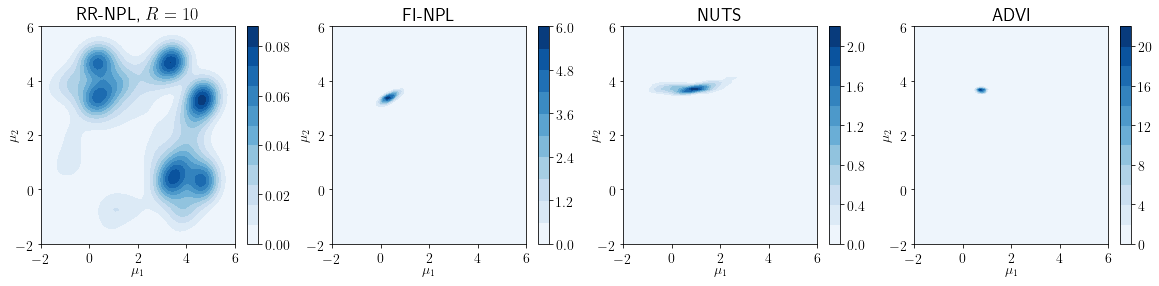

In [7]:
f=plt.figure(figsize = (20,4))
ticks = [0,0.02,0.04,0.06,0.08,0.10,0.12]
plt.subplot(1,4,1)
sns.kdeplot(np.concatenate((mu_bb_rr[:,1],[-2,-2,6,6])),np.concatenate((mu_bb_rr[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues',\
            cbar_kws = {'ticks':ticks});
plt.xlabel(r'$\mu_1$',fontsize = '14', labelpad =0);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.ylabel(r'$\mu_2$',fontsize = '14', labelpad = -5);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

plt.subplot(1,4,2)
sns.kdeplot(np.concatenate((mu_bb_mle[:,1],[-2,-2,6,6])),np.concatenate((mu_bb_mle[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\mu_1$',fontsize = '14', labelpad = 0);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.ylabel(r'$\mu_2$',fontsize = '14', labelpad = -5);
plt.title('FI-NPL',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((mu_nuts.iloc[:,1],[-2,-2,6,6])),np.concatenate((mu_nuts.iloc[:,0],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\mu_1$',fontsize = '14', labelpad = 0);
plt.ylabel(r'$\mu_2$',fontsize = '14', labelpad = -5);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.title('NUTS',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((mu_advi.iloc[:,2],[-2,-2,6,6])),np.concatenate((mu_advi.iloc[:,1],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\mu_1$',fontsize = '14', labelpad = 0)
plt.ylabel(r'$\mu_2$',fontsize = '14', labelpad = -5);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.title('ADVI',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

f.savefig('mu_sep.pdf', bbox_inches='tight')


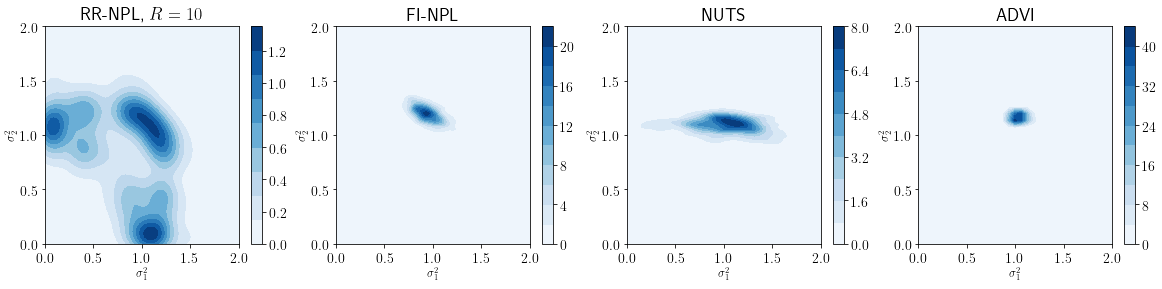

In [8]:
f=plt.figure(figsize = (20,4))
ticks = [0,0.2,0.4,0.6,0.8,1.0,1.2,1.4]

plt.subplot(1,4,1)
sns.kdeplot(np.concatenate((sigma_bb_rr[:,1],[0,0,2,2])),np.concatenate((sigma_bb_rr[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues',\
           cbar_kws = {'ticks':ticks});
plt.xlabel(r'$\sigma_1^2$',fontsize = '12',labelpad = 4);\
plt.xlim(0,2)
plt.ylim(0,2)
plt.ylabel(r'$\sigma_2^2$',fontsize = '12',labelpad = 0);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

plt.subplot(1,4,2)
sns.kdeplot(np.concatenate((sigma_bb_mle[:,1],[0,0,2,2])),np.concatenate((sigma_bb_mle[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\sigma_1^2$',fontsize = '12',labelpad = 4);
plt.xlim(0,2)
plt.ylim(0,2)
plt.ylabel(r'$\sigma_2^2$',fontsize = '12',labelpad = 0);
plt.title('FI-NPL',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((sigma_nuts.iloc[:,1],[0,0,2,2])),np.concatenate((sigma_nuts.iloc[:,0],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\sigma_1^2$',fontsize = '12',labelpad = 4);
plt.ylabel(r'$\sigma_2^2$',fontsize = '12',labelpad = 0);
plt.xlim(0,2)
plt.ylim(0,2)
plt.title('NUTS',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((sigma_advi.iloc[:,2],[0,0,6,6])),np.concatenate((sigma_advi.iloc[:,1],[0,6,0,6])),cbar = True, shade = True, shade_lowest=True,cmap = "Blues");
plt.xlabel(r'$\sigma_1^2$',fontsize = '12',labelpad = 4)
plt.ylabel(r'$\sigma_2^2$',fontsize = '12',labelpad = 0);
plt.xlim(0,2)
plt.ylim(0,2)
plt.title('ADVI',fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

f.savefig('sigma_sep.pdf', bbox_inches='tight')





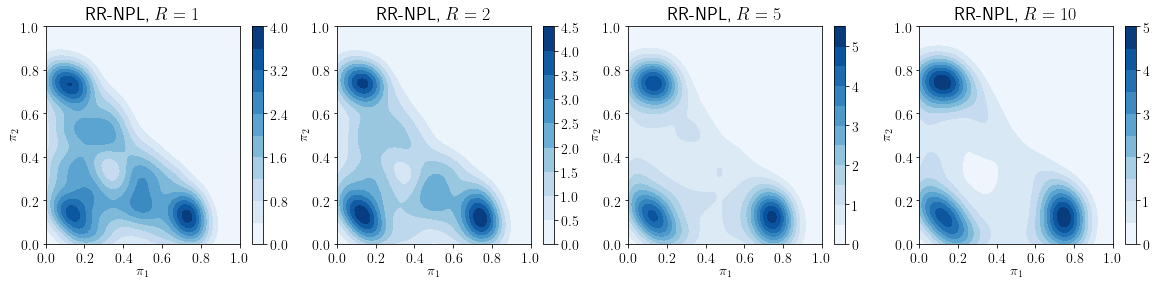

In [103]:
f = plt.figure(figsize = (20,4))
plt.subplot(1,4,1)
#0,2 for restart
#2,1 for mle
rep = 1
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])


sns.kdeplot(np.concatenate((pi_bb[:,1],[0,0,1,1])),np.concatenate((pi_bb[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14, labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel(r'$\pi_2$',fontsize = 14, labelpad = 0);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

rep =2
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

plt.subplot(1,4,2)
sns.kdeplot(np.concatenate((pi_bb[:,1],[0,0,1,1])),np.concatenate((pi_bb[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14, labelpad = 0);
plt.ylabel(r'$\pi_2$',fontsize = 14, labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

rep = 5
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((pi_bb[:,1],[0,0,1,1])),np.concatenate((pi_bb[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14, labelpad = 0);
plt.ylabel(r'$\pi_2$',fontsize = 14, labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

rep = 10
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((pi_bb[:,1],[0,0,1,1])),np.concatenate((pi_bb[:,2],[0,0,1,1])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\pi_1$',fontsize = 14, labelpad = 0);
plt.ylabel(r'$\pi_2$',fontsize = 14, labelpad = 0);
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)

cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
f.savefig('pi_reps.pdf', bbox_inches='tight')

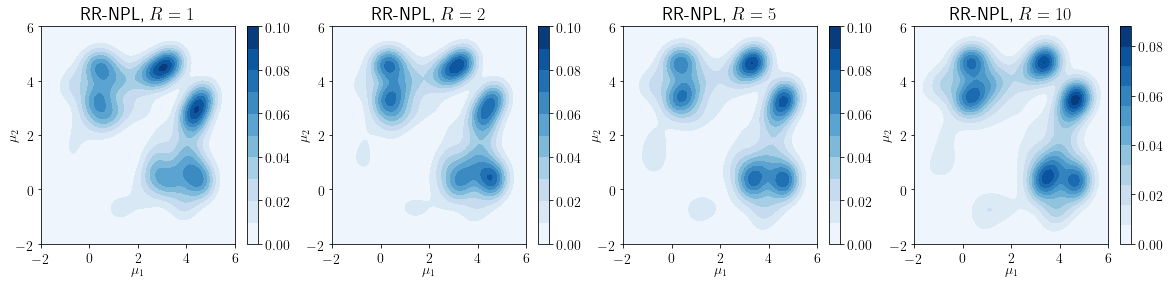

In [9]:
f = plt.figure(figsize = (20,4))
plt.subplot(1,4,1)
ticks = [0,0.02,0.04,0.06,0.08,0.10,0.12]
#0,2 for restart
#2,1 for mle
rep = 1
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

sns.kdeplot(np.concatenate((mu_bb[:,1],[-2,-2,6,6])),np.concatenate((mu_bb[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\mu_1$', fontsize = 14, labelpad = 0);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.ylabel(r'$\mu_2$', fontsize = 14, labelpad = -5);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

plt.subplot(1,4,2)
#0,2 for restart
#2,1 for mle
rep = 2
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

sns.kdeplot(np.concatenate((mu_bb[:,1],[-2,-2,6,6])),np.concatenate((mu_bb[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\mu_1$', fontsize = 14, labelpad = 0);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.ylabel(r'$\mu_2$', fontsize = 14, labelpad = -5);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

rep = 5
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((mu_bb[:,1],[-2,-2,6,6])),np.concatenate((mu_bb[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\mu_1$', fontsize = 14, labelpad = 0);
plt.ylabel(r'$\mu_2$', fontsize = 14, labelpad = -5);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

rep = 10
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
mu_bb =np.array(par_bb['mu'])[:,:,0]
sigma_bb = np.array(par_bb[['sigma']][0])

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((mu_bb[:,1],[-2,-2,6,6])),np.concatenate((mu_bb[:,2],[-2,6,-2,6])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues',cbar_kws = {'ticks':ticks});
plt.xlabel(r'$\mu_1$', fontsize = 14, labelpad = 0);
plt.ylabel(r'$\mu_2$', fontsize = 14, labelpad = -5);
plt.xlim(-2,6)
plt.ylim(-2,6)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([-2,0,2,4,6],fontsize=14)

f.savefig('mu_reps.pdf', bbox_inches='tight')

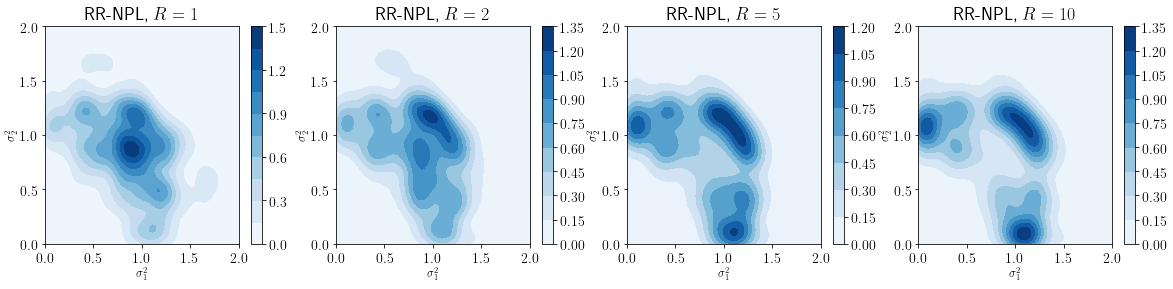

In [12]:
f = plt.figure(figsize = (20,4))
plt.subplot(1,4,1)
#0,2 for restart
#2,1 for mle
rep = 1
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
sigma_bb = np.array(par_bb[['sigma']][0])[:,:,0]

sns.kdeplot(np.concatenate((sigma_bb[:,1],[0,0,2,2])),np.concatenate((sigma_bb[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\sigma_1^2$',fontsize = 12, labelpad = 4);
plt.xlim(0,2)
plt.ylim(0,2)
plt.ylabel(r'$\sigma_2^2$',fontsize = 12, labelpad = 0);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

plt.subplot(1,4,2)
#0,2 for restart
#2,1 for mle
rep = 2
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
sigma_bb = np.array(par_bb[['sigma']][0])[:,:,0]

sns.kdeplot(np.concatenate((sigma_bb[:,1],[0,0,2,2])),np.concatenate((sigma_bb[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\sigma_1^2$',fontsize = 12, labelpad = 4);
plt.xlim(0,2)
plt.ylim(0,2)
plt.ylabel(r'$\sigma_2^2$',fontsize = 12, labelpad = 0);
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

rep = 5
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
sigma_bb =np.array(par_bb['sigma'])[:,:,0]

plt.subplot(1,4,3)
sns.kdeplot(np.concatenate((sigma_bb[:,1],[0,0,2,2])),np.concatenate((sigma_bb[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\sigma_1^2$',fontsize = 12, labelpad = 4);
plt.ylabel(r'$\sigma_2^2$',fontsize = 12, labelpad = 0);
plt.xlim(0,2)
plt.ylim(0,2)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

rep = 10
par_bb = pd.read_pickle('./parameters/par_bb_sep_rr_rep{}_B2000_plot'.format(rep))
pi_bb =np.array(par_bb['pi'])
sigma_bb =np.array(par_bb['sigma'])[:,:,0]

plt.subplot(1,4,4)
sns.kdeplot(np.concatenate((sigma_bb[:,1],[0,0,2,2])),np.concatenate((sigma_bb[:,2],[0,2,0,2])),cbar = True, shade = True, shade_lowest=True,cmap = 'Blues');
plt.xlabel(r'$\sigma_1^2$',fontsize = 12, labelpad = 4);
plt.ylabel(r'$\sigma_2^2$',fontsize = 12, labelpad = 0);
plt.xlim(0,2)
plt.ylim(0,2)
plt.title(r'RR-NPL, $R = {}$'.format(rep),fontsize = 18)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=14)
plt.xticks(fontsize=14)
plt.yticks([0,0.5,1,1.5,2],fontsize=14)

f.savefig('sigma_reps.pdf', bbox_inches='tight')